# **Challenge 1**<br>
**Data Science B**<br>
Nabila Dwi Cahyani - 0151425120-34




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pulp import *
from tabulate import tabulate
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('menu.csv')
df.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,Sodium (% Daily Value),Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,260,87,750,31,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,25,8,770,32,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,45,15,780,33,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,285,95,860,36,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,50,16,880,37,30,10,4,17,2,21,6,0,25,10


In [3]:
menu = df.copy()

In [4]:
# Check for Nulls
print(df.isnull().any())
print("--------------------------------------")
# check for numbers
print(df.describe())
print("--------------------------------------")

Category                         False
Item                             False
Serving Size                     False
Calories                         False
Calories from Fat                False
Total Fat                        False
Total Fat (% Daily Value)        False
Saturated Fat                    False
Saturated Fat (% Daily Value)    False
Trans Fat                        False
Cholesterol                      False
Cholesterol (% Daily Value)      False
Sodium                           False
Sodium (% Daily Value)           False
Carbohydrates                    False
Carbohydrates (% Daily Value)    False
Dietary Fiber                    False
Dietary Fiber (% Daily Value)    False
Sugars                           False
Protein                          False
Vitamin A (% Daily Value)        False
Vitamin C (% Daily Value)        False
Calcium (% Daily Value)          False
Iron (% Daily Value)             False
dtype: bool
--------------------------------------
          Cal

In [5]:
df=df[["Category","Item","Calories","Total Fat (% Daily Value)","Saturated Fat (% Daily Value)","Cholesterol (% Daily Value)","Sodium (% Daily Value)","Carbohydrates (% Daily Value)","Dietary Fiber (% Daily Value)","Vitamin A (% Daily Value)","Vitamin C (% Daily Value)","Calcium (% Daily Value)","Iron (% Daily Value)","Protein","Sugars","Trans Fat"]]

In [6]:
df.rename(columns = {"Total Fat (% Daily Value)":"Total Fat","Saturated Fat (% Daily Value)":"Saturated Fat","Cholesterol (% Daily Value)":"Cholesterol","Sodium (% Daily Value)":"Sodium","Carbohydrates (% Daily Value)":"Carbohydrates","Dietary Fiber (% Daily Value)":"Dietary Fiber","Vitamin A (% Daily Value)":"Vitamin A","Vitamin C (% Daily Value)":"Vitamin C","Calcium (% Daily Value)":"Calcium","Iron (% Daily Value)":"Iron"},inplace=True)
df.head(260)

,Category,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Iron,Protein,Sugars,Trans Fat
0,Breakfast,Egg McMuffin,300,20,25,87,31,10,17,10,0,25,15,17,3,0.0
1,Breakfast,Egg White Delight,250,12,15,8,32,10,17,6,0,25,8,18,3,0.0
2,Breakfast,Sausage McMuffin,370,35,42,15,33,10,17,8,0,25,10,14,2,0.0
3,Breakfast,Sausage McMuffin with Egg,450,43,52,95,36,10,17,15,0,30,15,21,2,0.0
4,Breakfast,Sausage McMuffin with Egg Whites,400,35,42,16,37,10,17,6,0,25,10,21,2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Smoothies & Shakes,McFlurry with Oreo Cookies (Small),510,26,44,14,12,27,4,15,0,40,8,12,64,0.5
256,Smoothies & Shakes,McFlurry with Oreo Cookies (Medium),690,35,58,19,16,35,5,20,0,50,10,15,85,1.0
257,Smoothies & Shakes,McFlurry with Oreo Cookies (Snack),340,17,29,9,8,18,2,10,0,25,6,8,43,0.0
258,Smoothies & Shakes,McFlurry with Reese's Peanut Butter Cups (Medium),810,50,76,20,17,38,9,20,0,60,6,21,103,1.0


# **A. How many calories does the average McDonald's value meal contain?**

In [7]:
a=df.iloc[0:260,:].groupby("Category").Calories.mean().round(2)

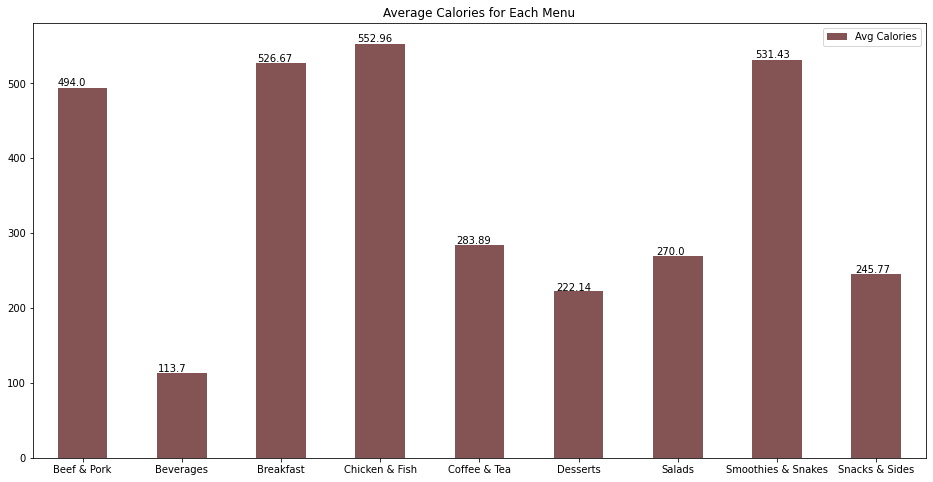

In [8]:
# Define dataframes for each category
bp = df.loc[df.Category == 'Beef & Pork']
bev = df.loc[df.Category == 'Beverages']
bf = df.loc[df.Category == 'Breakfast']
cf = df.loc[df.Category == 'Chicken & Fish']
ct = df.loc[df.Category == 'Coffee & Tea']
ds = df.loc[df.Category == 'Desserts']
sld = df.loc[df.Category == 'Salads']
smns = df.loc[df.Category == 'Smoothies & Shakes']
snack = df.loc[df.Category == 'Snacks & Sides']


# Average calories on each categories
avg_cat = [round(bp['Calories'].mean(), 2), round(bev['Calories'].mean(),2), round(bf['Calories'].mean(), 2), round(cf['Calories'].mean(), 2), round(ct['Calories'].mean(), 2), round(ds['Calories'].mean(), 2), round(sld['Calories'].mean(), 2), round(smns['Calories'].mean(), 2), round(snack['Calories'].mean(), 2)]
index = ['Beef & Pork', 'Beverages', 'Breakfast', 'Chicken & Fish', 'Coffee & Tea', 'Desserts', 'Salads', 'Smoothies & Snakes', 'Snacks & Sides']
avg_calat= pd.DataFrame({'Avg Calories': avg_cat}, index=index)
ax = avg_calat.plot.bar(rot=0, color=sns.color_palette("pink", n_colors = 5), figsize=(16,8), 
                       title='Average Calories for Each Menu', legend=True)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

Chicken & Fish categories has the highest calories

# **B. How much do the beverages, like soda or coffee, contribute to the overall caloric intake?**

For Coffee & Tea

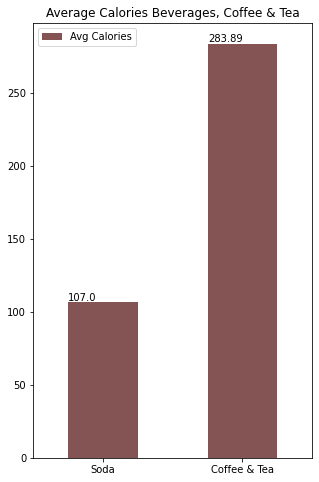

In [9]:
# Define dataframes for each category
bev = df.iloc[110:130]
ct = df.loc[df.Category == 'Coffee & Tea']

# Average calories on each categories
avg_bef = [round(bev['Calories'].mean(), 2), round(ct['Calories'].mean(), 2)]
index = ['Soda', 'Coffee & Tea']
avg_bev= pd.DataFrame({'Avg Calories': avg_bef}, index=index)
ay = avg_bev.plot.bar(rot=0, color=sns.color_palette("pink", n_colors = 5), figsize=(5,8), 
                       title='Average Calories Beverages, Coffee & Tea', legend=True)
for q in ay.patches:
    ay.annotate(str(q.get_height()), (q.get_x() * 1.005, q.get_height() * 1.005))

In [10]:
# Define Dataframes for coffetea
coffee = df.iloc[137:232]

# Generally, the recommended daily calorie intake is 2,000 calories a day for women and 2,500 for men
# Get caloric intake contribution from coffee
cal_coffee = pd.DataFrame({'Item': coffee.Item, 'Calories': coffee.Calories})
cal_coffee['Calories'] = cal_coffee.Calories/2000
cal_coffee.head()

,Item,Calories
137,Iced Tea (Small),0.000
138,Iced Tea (Medium),0.000
139,Iced Tea (Large),0.000
140,Iced Tea (Child),0.000
141,Sweet Tea (Small),0.075


In [11]:
avg_coffee = coffee['Calories'].mean()
print("Average calories of Coffee & Tea is", round(avg_coffee, 2))

avg_coffee = pd.to_numeric(avg_coffee)
coffee_cal = avg_coffee/2000
print("Average of Coffee & Tea contribute to caloric intake is", round(coffee_cal, 2))

Average calories of Coffee & Tea is 283.89
Average of Coffee & Tea contribute to caloric intake is 0.14


For Soda

In [12]:
# Define Dataframes for Soda
soda = df.iloc[110:130]

# Generally, the recommended daily calorie intake is 2,000 calories a day for women and 2,500 for men
# Get caloric intake contribution from Soda
cal_soda = pd.DataFrame({'Item': soda.Item, 'Calories': soda.Calories})
cal_soda['Calories'] = cal_soda.Calories/2000
cal_soda.head()

,Item,Calories
110,Coca-Cola Classic (Small),0.07
111,Coca-Cola Classic (Medium),0.10
112,Coca-Cola Classic (Large),0.14
113,Coca-Cola Classic (Child),0.05
114,Diet Coke (Small),0.00


In [13]:
# Average Calories in Soda
avg_soda = soda['Calories'].mean()
print("Average calories of Soda is", round(avg_soda, 2))

avg_soda = pd.to_numeric(avg_soda)
soda_cal = avg_soda/2000
print("Average Soda contribute to caloric intake is", round(soda_cal, 2))

Average calories of Soda is 107.0
Average Soda contribute to caloric intake is 0.05


# **C. Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?**

In [14]:
df.Item.value_counts()

Nonfat Latte (Small)                                    1
Bacon McDouble                                          1
Diet Coke (Child)                                       1
Bacon, Egg & Cheese McGriddles                          1
Iced Tea (Large)                                        1
                                                       ..
Vanilla Shake (Medium)                                  1
Hazelnut Iced Coffee (Small)                            1
Steak & Egg McMuffin                                    1
Premium McWrap Chicken Sweet Chili (Grilled Chicken)    1
Hotcakes and Sausage                                    1
Name: Item, Length: 260, dtype: int64

In [15]:
grilled = df[df['Item'].str.contains("Grilled")]
crispy = df[df['Item'].str.contains("Crispy")]

In [16]:
cal_avg_grilled = round(grilled.Calories.mean(),2)
ch_avg_grilled = round(grilled.Cholesterol.mean(),2)
pro_avg_grilled = round(grilled.Protein.mean(),2)
s_avg_grilled = round(grilled.Sodium.mean(),2)
carbo_avg_grilled = round(grilled.Carbohydrates.mean(),2)
tfat_avg_grilled = round(grilled['Total Fat'].mean(),2)
sfat_avg_grilled = round(grilled['Saturated Fat'].mean(),2)
df_avg_grilled = round(grilled['Dietary Fiber'].mean(),2)
sg_avg_grilled = round(grilled['Sugars'].mean(),2)
va_avg_grilled = round(grilled['Vitamin A'].mean(),2)
vc_avg_grilled = round(grilled['Vitamin C'].mean(),2)
c_avg_grilled = round(grilled['Calcium'].mean(),2)
iron_avg_grilled = round(grilled['Iron'].mean(),2)
print("The average for Grilled Chicken category is: ","\nCalories\t:",cal_avg_grilled, "Cal.\nCholesterol\t:",cal_avg_grilled, "mg.\nProtein\t\t:",pro_avg_grilled, "g.\nSodium\t\t:", s_avg_grilled,"mg.\nCarbohydrates\t:", carbo_avg_grilled, "%DV\nTotal Fat\t:",tfat_avg_grilled,"%DV\nSaturated Fat\t:",sfat_avg_grilled,"%DV\nDietary Fiber\t:",df_avg_grilled,"g.\nSugars\t\t:",s_avg_grilled, "g.\nVitamin A\t:", va_avg_grilled, "%DV\nVitamin C\t:", vc_avg_grilled, "%DV\nCalcium\t\t:", c_avg_grilled, "%DV\nIron\t\t:", iron_avg_grilled,"%DV")
cal_avg_crispy = round(crispy.Calories.mean(),2)
ch_avg_crispy = crispy.Cholesterol.mean()
pro_avg_crispy = round(crispy.Protein.mean(),2)
s_avg_crispy = round(crispy.Sodium.mean(), 2)
carbo_avg_crispy = round(crispy.Carbohydrates.mean(), 2)
tfat_avg_crispy = round(crispy['Total Fat'].mean(),2)
sfat_avg_crispy = round(crispy['Saturated Fat'].mean(),2)
df_avg_crispy = round(crispy['Dietary Fiber'].mean(),2)
sg_avg_crispy = round(crispy['Sugars'].mean(),2)
va_avg_crispy = round(crispy['Vitamin A'].mean(),2)
vc_avg_crispy = round(crispy['Vitamin C'].mean(),2)
c_avg_crispy = round(crispy['Calcium'].mean(),2)
iron_avg_crispy = round(crispy['Iron'].mean(),2)
print("The average for Crispy Chicken category is: ","\nCalories\t:",cal_avg_crispy, "Cal.\nCholesterol\t:",cal_avg_crispy, "mg.\nProtein\t\t:",pro_avg_crispy, "g.\nSodium\t\t:", s_avg_crispy,"mg.\nCarbohydrates\t:", carbo_avg_crispy, "%DV\nTotal Fat\t:",tfat_avg_crispy,"%DV\nSaturated Fat\t:",sfat_avg_crispy,"%DV\nDietary Fiber\t:",df_avg_crispy,"g.\nSugars\t\t:",s_avg_crispy, "g.\nVitamin A\t:", va_avg_crispy, "%DV\nVitamin C\t:", vc_avg_crispy, "%DV\nCalcium\t\t:", c_avg_crispy, "%DV\nIron\t\t:", iron_avg_crispy, "%DV")

The average for Grilled Chicken category is:  
Calories	: 386.92 Cal.
Cholesterol	: 386.92 mg.
Protein		: 28.62 g.
Sodium		: 42.38 mg.
Carbohydrates	: 12.38 %DV
Total Fat	: 21.46 %DV
Saturated Fat	: 24.08 %DV
Dietary Fiber	: 12.92 g.
Sugars		: 42.38 g.
Vitamin A	: 43.23 %DV
Vitamin C	: 16.46 %DV
Calcium		: 16.38 %DV
Iron		: 16.0 %DV
The average for Crispy Chicken category is:  
Calories	: 520.0 Cal.
Cholesterol	: 520.0 mg.
Protein		: 24.93 g.
Sodium		: 47.86 mg.
Carbohydrates	: 16.29 %DV
Total Fat	: 38.5 %DV
Saturated Fat	: 30.64 %DV
Dietary Fiber	: 12.5 g.
Sugars		: 47.86 g.
Vitamin A	: 39.0 %DV
Vitamin C	: 13.79 %DV
Calcium		: 16.64 %DV
Iron		: 15.93 %DV


Comparison of Calories, Cholesterol, Carbohydrates, Protein, and Total Fat for Grilled and Crispy menu

In [17]:
df['isGrilled'] = df.Item.str.contains("Grilled")
df['isCrispy'] = df.Item.str.contains("Crispy")

In [18]:
grilled_df = df[df['isGrilled'] == True]
crispy_df = df[df['isCrispy'] == True]
grilled_df=grilled_df[['Item','Total Fat','Calories','Cholesterol','Carbohydrates','Protein']]
crispy_df=crispy_df[['Item','Total Fat','Calories','Cholesterol','Carbohydrates','Protein']]

In [19]:
df1=grilled_df.reset_index(drop=True).merge(crispy_df.reset_index(drop=True),left_index=True,right_index=True)

In [20]:
df1.columns=['Items-Grilled','TotalFat-Grilled','Calories-Grilled','Cholesterol-Grilled','Carbohydrates-Grilled','Protein-Grilled','Items-Crispy','TotalFat-Crispy','Calories-Crispy','Cholesterol-Crispy','Carbohydrates-Crispy','Protein-Crispy']
df1=df1.drop('Items-Crispy',axis=1)

In [21]:
df1['Item']=df1['Items-Grilled'].str.replace("Grilled","")

In [22]:
df1=df1.drop('Items-Grilled',axis=1)

In [23]:
df1.index = df1.Item
df1.head()

,TotalFat-Grilled,Calories-Grilled,Cholesterol-Grilled,Carbohydrates-Grilled,Protein-Grilled,TotalFat-Crispy,Calories-Crispy,Cholesterol-Crispy,Carbohydrates-Crispy,Protein-Crispy,Item
Item,,,,,,,,,,,
Premium Chicken Classic Sandwich,13,350,22,14,28,33,510,16,18,24,Premium Chicken Classic Sandwich
Premium Chicken Club Sandwich,31,510,35,15,40,51,670,29,19,36,Premium Chicken Club Sandwich
Premium Chicken Ranch BLT Sandwich,23,450,30,14,36,43,610,24,19,32,Premium Chicken Ranch BLT Sandwich
Bacon Clubhouse Chicken Sandwich,39,590,37,17,40,59,750,31,22,36,Bacon Clubhouse Chicken Sandwich
Premium McWrap Chicken & Bacon ( Chicken),28,480,32,14,36,29,430,14,14,21,Premium McWrap Chicken & Bacon ( Chicken)


In [24]:
df1.drop(columns="Item", inplace = True)

In [25]:
df1["TotalFat-Crispy"].replace({43:33}, inplace = True)
df1.iloc[[2,0]]

,TotalFat-Grilled,Calories-Grilled,Cholesterol-Grilled,Carbohydrates-Grilled,Protein-Grilled,TotalFat-Crispy,Calories-Crispy,Cholesterol-Crispy,Carbohydrates-Crispy,Protein-Crispy
Item,,,,,,,,,,
Premium Chicken Ranch BLT Sandwich,23,450,30,14,36,33,610,24,19,32
Premium Chicken Classic Sandwich,13,350,22,14,28,33,510,16,18,24


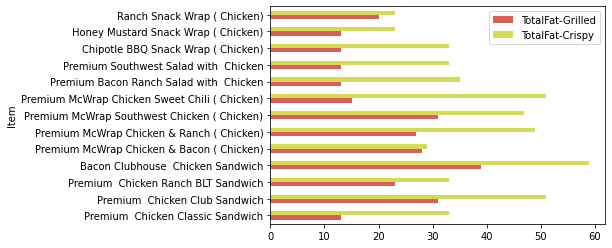

In [26]:
df1[["TotalFat-Grilled", "TotalFat-Crispy"]].plot(kind = 'barh', color = sns.color_palette("hls"))

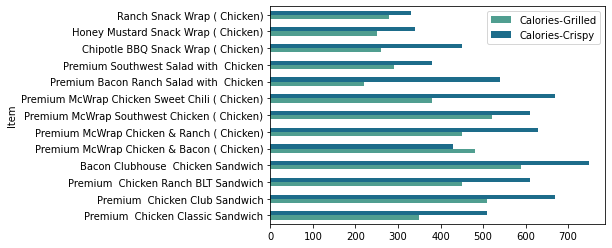

In [27]:
df1[["Calories-Grilled", "Calories-Crispy"]].plot(kind = 'barh', color = sns.color_palette("crest", n_colors=2))

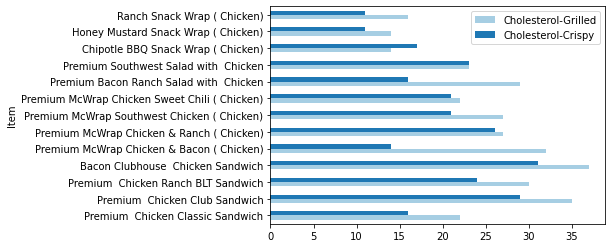

In [28]:
df1[["Cholesterol-Grilled", "Cholesterol-Crispy"]].plot(kind = 'barh', color = sns.color_palette("Paired"))

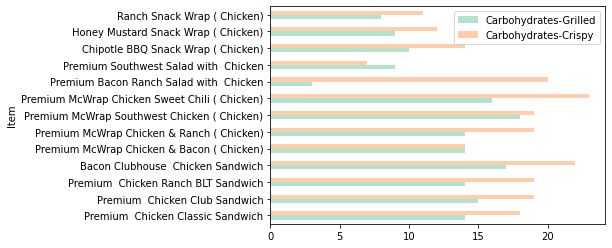

In [29]:
df1[["Carbohydrates-Grilled", "Carbohydrates-Crispy"]].plot(kind = 'barh', color = sns.color_palette("Pastel2"))

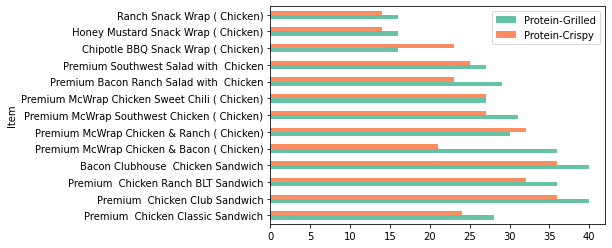

In [30]:
df1[["Protein-Grilled", "Protein-Crispy"]].plot(kind = 'barh', color = sns.color_palette("Set2"))


*   The **Crispy** food items have **higher fat, calories and carbohydrates content** present as compared to **Grilled** food items
*   These items (Chicken and Sandwiches) already have a **high calories content** as shown in the previous chart, now we can distinguish them on the basis of **Fat content** as  well
*   The **Grilled** food items have the **higher cholesterol and protein** compared to **Crispy** food items





# **D. What about ordering egg whites instead of whole eggs?**

In [31]:
new_df = df.copy()
new_df['Item'] = new_df['Item'].str.lower()

In [32]:
egg_copy = new_df[new_df['Item'].str.contains('egg')]
eggWhite = egg_copy[egg_copy['Item'].str.contains('white')]
wholeEgg = egg_copy[~egg_copy['Item'].str.contains('white')]

In [33]:
cal_avg_white = round(eggWhite.Calories.mean(),2)
ch_avg_white = round(eggWhite.Cholesterol.mean(),2)
pro_avg_white = round(eggWhite.Protein.mean(),2)
s_avg_white = round(eggWhite.Sodium.mean(),2)
carbo_avg_white = round(eggWhite.Carbohydrates.mean(),2)
tfat_avg_white = round(eggWhite['Total Fat'].mean(),2)
sfat_avg_white = round(eggWhite['Saturated Fat'].mean(),2)
df_avg_white = round(eggWhite['Dietary Fiber'].mean(),2)
sg_avg_white = round(eggWhite['Sugars'].mean(),2)
va_avg_white = round(eggWhite['Vitamin A'].mean(),2)
vc_avg_white = round(eggWhite['Vitamin C'].mean(),2)
c_avg_white = round(eggWhite['Calcium'].mean(),2)
iron_avg_white = round(eggWhite['Iron'].mean(),2)
print("The average for Egg White category is: ","\nCalories\t:",cal_avg_white, "Cal.\nCholesterol\t:",cal_avg_white, "mg.\nProtein\t\t:",pro_avg_white, "g.\nSodium\t\t:", s_avg_grilled,"mg.\nCarbohydrates\t:", carbo_avg_white, "%DV\nTotal Fat\t:",tfat_avg_white,"%DV\nSaturated Fat\t:",sfat_avg_white,"%DV\nDietary Fiber\t:",df_avg_white,"g.\nSugars\t\t:",s_avg_white, "g.\nVitamin A\t:", va_avg_white, "%DV\nVitamin C\t:", vc_avg_white, "%DV\nCalcium\t\t:", c_avg_white, "%DV\nIron\t\t:", iron_avg_white,"%DV")
cal_avg_whole = round(wholeEgg.Calories.mean(),2)
ch_avg_whole = wholeEgg.Cholesterol.mean()
pro_avg_whole = round(wholeEgg.Protein.mean(),2)
s_avg_whole = round(wholeEgg.Sodium.mean(), 2)
carbo_avg_whole = round(wholeEgg.Carbohydrates.mean(), 2)
tfat_avg_whole = round(wholeEgg['Total Fat'].mean(),2)
sfat_avg_whole = round(wholeEgg['Saturated Fat'].mean(),2)
df_avg_whole = round(wholeEgg['Dietary Fiber'].mean(),2)
sg_avg_whole = round(wholeEgg['Sugars'].mean(),2)
va_avg_whole = round(wholeEgg['Vitamin A'].mean(),2)
vc_avg_whole = round(wholeEgg['Vitamin C'].mean(),2)
c_avg_whole = round(wholeEgg['Calcium'].mean(),2)
iron_avg_whole = round(wholeEgg['Iron'].mean(),2)
print("The average for Whole Egg category is: ","\nCalories\t:",cal_avg_whole, "Cal.\nCholesterol\t:",cal_avg_whole, "mg.\nProtein\t\t:",pro_avg_whole, "g.\nSodium\t\t:", s_avg_whole,"mg.\nCarbohydrates\t:", carbo_avg_whole, "%DV\nTotal Fat\t:",tfat_avg_whole,"%DV\nSaturated Fat\t:",sfat_avg_whole,"%DV\nDietary Fiber\t:",df_avg_whole,"g.\nSugars\t\t:",s_avg_whole, "g.\nVitamin A\t:", va_avg_whole, "%DV\nVitamin C\t:", vc_avg_whole, "%DV\nCalcium\t\t:", ch_avg_whole, "%DV\nIron\t\t:", iron_avg_whole, "%DV")

The average for Egg White category is:  
Calories	: 565.38 Cal.
Cholesterol	: 565.38 mg.
Protein		: 23.69 g.
Sodium		: 42.38 mg.
Carbohydrates	: 17.62 %DV
Total Fat	: 44.46 %DV
Saturated Fat	: 56.15 %DV
Dietary Fiber	: 13.85 g.
Sugars		: 59.77 g.
Vitamin A	: 3.54 %DV
Vitamin C	: 3.77 %DV
Calcium		: 17.0 %DV
Iron		: 15.23 %DV
The average for Whole Egg category is:  
Calories	: 506.67 Cal.
Cholesterol	: 506.67 mg.
Protein		: 22.08 g.
Sodium		: 51.25 mg.
Carbohydrates	: 13.83 %DV
Total Fat	: 43.58 %DV
Saturated Fat	: 58.58 %DV
Dietary Fiber	: 11.42 g.
Sugars		: 51.25 g.
Vitamin A	: 12.58 %DV
Vitamin C	: 4.08 %DV
Calcium		: 89.25 %DV
Iron		: 18.75 %DV


In [34]:
df_1 = pd.DataFrame(new_df.iloc[[3,4],1:])
df_1

,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Iron,Protein,Sugars,Trans Fat,isGrilled,isCrispy
3,sausage mcmuffin with egg,450,43,52,95,36,10,17,15,0,30,15,21,2,0.0,False,False
4,sausage mcmuffin with egg whites,400,35,42,16,37,10,17,6,0,25,10,21,2,0.0,False,False


In [35]:
df_2 = pd.DataFrame(new_df.iloc[[12,14],1:])
df_2

,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Iron,Protein,Sugars,Trans Fat,isGrilled,isCrispy
12,sausage biscuit with egg (regular biscuit),510,50,71,83,49,12,6,6,0,10,20,18,2,0.0,False,False
14,sausage biscuit with egg whites (regular biscuit),460,42,62,11,49,11,6,0,0,8,15,18,3,0.0,False,False


In [36]:
df_3 = pd.DataFrame(new_df.iloc[[13,15],1:])
df_3

,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Iron,Protein,Sugars,Trans Fat,isGrilled,isCrispy
13,sausage biscuit with egg (large biscuit),570,57,74,83,53,14,11,10,0,10,20,18,3,0.0,False,False
15,sausage biscuit with egg whites (large biscuit),520,49,65,11,54,13,11,4,0,8,15,18,3,0.0,False,False


In [37]:
frames = [df_1, df_2, df_3]
result = pd.concat(frames)

In [38]:
result

,Item,Calories,Total Fat,Saturated Fat,Cholesterol,Sodium,Carbohydrates,Dietary Fiber,Vitamin A,Vitamin C,Calcium,Iron,Protein,Sugars,Trans Fat,isGrilled,isCrispy
3,sausage mcmuffin with egg,450,43,52,95,36,10,17,15,0,30,15,21,2,0.0,False,False
4,sausage mcmuffin with egg whites,400,35,42,16,37,10,17,6,0,25,10,21,2,0.0,False,False
12,sausage biscuit with egg (regular biscuit),510,50,71,83,49,12,6,6,0,10,20,18,2,0.0,False,False
14,sausage biscuit with egg whites (regular biscuit),460,42,62,11,49,11,6,0,0,8,15,18,3,0.0,False,False
13,sausage biscuit with egg (large biscuit),570,57,74,83,53,14,11,10,0,10,20,18,3,0.0,False,False
15,sausage biscuit with egg whites (large biscuit),520,49,65,11,54,13,11,4,0,8,15,18,3,0.0,False,False


In [39]:
egg_df = result[result['Item'].str.contains('egg')]
# egg_with_white = egg_df[egg_df['Item'].str.contains('white')]
# egg_without_white = egg_df[~egg_df['Item'].str.contains('white')]

In [40]:
egg_df['eggWhite'] = egg_df.Item.str.contains('white')
egg_df['wholeEgg'] = ~egg_df.Item.str.contains('white')

In [41]:
wholeEgg_df = egg_df[egg_df['wholeEgg'] == True]
eggWhite_df = egg_df[egg_df['eggWhite'] == True]
wholeEgg_df = wholeEgg_df[['Item','Total Fat','Calories','Cholesterol','Carbohydrates','Protein']]
eggWhite_df = eggWhite_df[['Item','Total Fat','Calories','Cholesterol','Carbohydrates','Protein']]

In [42]:
eggWhite_df

,Item,Total Fat,Calories,Cholesterol,Carbohydrates,Protein
4,sausage mcmuffin with egg whites,35,400,16,10,21
14,sausage biscuit with egg whites (regular biscuit),42,460,11,11,18
15,sausage biscuit with egg whites (large biscuit),49,520,11,13,18


In [43]:
df_egg=wholeEgg_df.reset_index(drop=True).merge(eggWhite_df.reset_index(drop=True),left_index=True,right_index=True)

In [44]:
df_egg.columns=['Items-wholeEgg','TotalFat-wholeEgg','Calories-wholeEgg','Cholesterol-wholeEgg','Carbohydrates-wholeEgg','Protein-wholeEgg','Items-eggWhite','TotalFat-eggWhite','Calories-eggWhite','Cholesterol-eggWhite','Carbohydrates-eggWhite','Protein-eggWhite']
df_egg=df_egg.drop('Items-eggWhite',axis=1)

In [45]:
df_egg.head()

,Items-wholeEgg,TotalFat-wholeEgg,Calories-wholeEgg,Cholesterol-wholeEgg,Carbohydrates-wholeEgg,Protein-wholeEgg,TotalFat-eggWhite,Calories-eggWhite,Cholesterol-eggWhite,Carbohydrates-eggWhite,Protein-eggWhite
0,sausage mcmuffin with egg,43,450,95,10,21,35,400,16,10,21
1,sausage biscuit with egg (regular biscuit),50,510,83,12,18,42,460,11,11,18
2,sausage biscuit with egg (large biscuit),57,570,83,14,18,49,520,11,13,18


In [46]:
df_egg['Item'] = df_egg['Items-wholeEgg'].str.replace("wholeEgg","")

In [47]:
df_egg = df_egg.drop('Items-wholeEgg',axis =1)

In [48]:
df_egg.head()

,TotalFat-wholeEgg,Calories-wholeEgg,Cholesterol-wholeEgg,Carbohydrates-wholeEgg,Protein-wholeEgg,TotalFat-eggWhite,Calories-eggWhite,Cholesterol-eggWhite,Carbohydrates-eggWhite,Protein-eggWhite,Item
0,43,450,95,10,21,35,400,16,10,21,sausage mcmuffin with egg
1,50,510,83,12,18,42,460,11,11,18,sausage biscuit with egg (regular biscuit)
2,57,570,83,14,18,49,520,11,13,18,sausage biscuit with egg (large biscuit)


In [49]:
df_egg.index = df_egg.Item
df_egg

,TotalFat-wholeEgg,Calories-wholeEgg,Cholesterol-wholeEgg,Carbohydrates-wholeEgg,Protein-wholeEgg,TotalFat-eggWhite,Calories-eggWhite,Cholesterol-eggWhite,Carbohydrates-eggWhite,Protein-eggWhite,Item
Item,,,,,,,,,,,
sausage mcmuffin with egg,43,450,95,10,21,35,400,16,10,21,sausage mcmuffin with egg
sausage biscuit with egg (regular biscuit),50,510,83,12,18,42,460,11,11,18,sausage biscuit with egg (regular biscuit)
sausage biscuit with egg (large biscuit),57,570,83,14,18,49,520,11,13,18,sausage biscuit with egg (large biscuit)


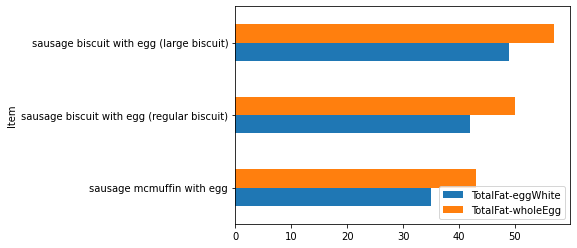

In [50]:
df_egg[["TotalFat-eggWhite","TotalFat-wholeEgg"]].plot(kind = 'barh')

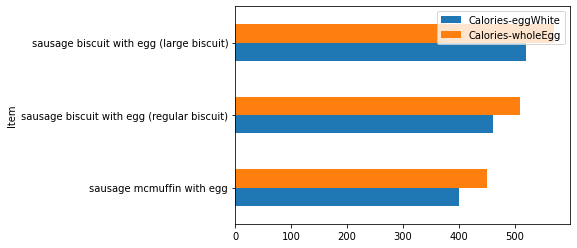

In [51]:
df_egg[["Calories-eggWhite","Calories-wholeEgg"]].plot(kind = 'barh')

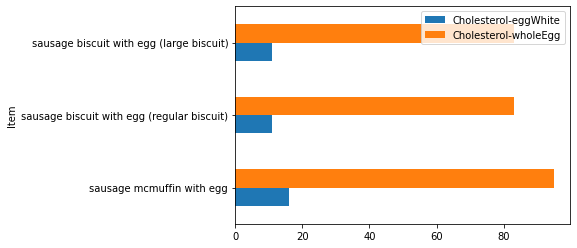

In [52]:
df_egg[["Cholesterol-eggWhite","Cholesterol-wholeEgg"]].plot(kind = 'barh')

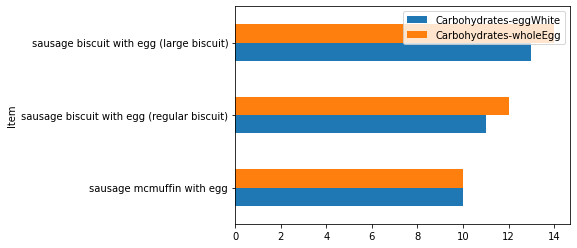

In [53]:
df_egg[["Carbohydrates-eggWhite","Carbohydrates-wholeEgg"]].plot(kind = 'barh')

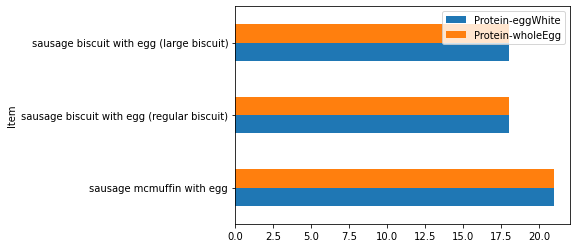

In [54]:
df_egg[["Protein-eggWhite","Protein-wholeEgg"]].plot(kind = 'barh')

# **E. What is the least number of items could you order from the menu to meet one day's nutritional requirements?**

**Energy**: 8,400kJ/2,000kcal<br>
**Total fat**: less than 70g<br>
**Saturates**: less than 20g<br>
**Carbohydrate**: at least 260g<br>
**Total sugars**: 90g<br>
**Protein**: 50g<br>
**Salt**: less than 6g<br>

In [55]:
!pip install pulp

In [62]:
#Convert the item names to a list
MenuItems = menu.Item.tolist()

#Convert all of the macro nutrients fields to be dictionaries of the item names
Calories = menu.set_index('Item')['Calories'].to_dict()
TotalFat = menu.set_index('Item')['Total Fat'].to_dict()
SaturatedFat = menu.set_index('Item')['Saturated Fat'].to_dict()
Carbohydrates = menu.set_index('Item')['Carbohydrates'].to_dict()
Sugars = menu.set_index('Item')['Sugars'].to_dict()
Protein = menu.set_index('Item')['Protein'].to_dict()
Sodium = menu.set_index('Item')['Sodium'].to_dict()

#Setting it up as a minimization problem
prob = LpProblem("McOptimization Problem", LpMinimize)
MenuItems_vars = LpVariable.dicts("MenuItems",MenuItems,lowBound=0, upBound=10,cat='Integer')
sum = 0

#First entry is the calorie calculation
prob += lpSum([Calories[i]*MenuItems_vars[i] for i in MenuItems]), "Calories"

#Total Fat must be <=70g
prob += lpSum([TotalFat[i]*MenuItems_vars[i] for i in MenuItems]) <= 70, "Total Fat"

# Saturated Fat is <= 20 g
prob += lpSum([SaturatedFat[i]*MenuItems_vars[i] for i in MenuItems]) <= 20, "SaturatedFat"

# Carbohydrate between 255 - 325
prob += lpSum([Carbohydrates[i]*MenuItems_vars[i] for i in MenuItems]) >= 255, "Carbohydrates lower"
prob += lpSum([Carbohydrates[i]*MenuItems_vars[i] for i in MenuItems]) <= 325, "Carbohydrates upper"

#Sugar between 80-100
prob += lpSum([Sugars[i]*MenuItems_vars[i] for i in MenuItems]) >= 80, "Sugars_lower"
prob += lpSum([Sugars[i]*MenuItems_vars[i] for i in MenuItems]) <= 100, "Sugars_upper"

#Protein between 45-55g
prob += lpSum([Protein[i]*MenuItems_vars[i] for i in MenuItems]) >= 41, "Protein_lower"
prob += lpSum([Protein[i]*MenuItems_vars[i] for i in MenuItems]) <= 51, "Protein_upper"

#Sodium <=6000mg
prob += lpSum([Sodium[i]*MenuItems_vars[i] for i in MenuItems]) <=6000, "Sodium"


prob.writeLP("McOptimization.lp")
prob.solve()
data_matrix = []
data_matrix.append(['Item', 'Amount','Calories','Total Fat','Carbohydrates','Protein','Sodium'])

print("Status:", LpStatus[prob.status])
for v in prob.variables():
    if v.varValue > 0:
        Item = menu.loc[df['Item'] == v.name.replace('MenuItems_','').replace('_',' ')]
        Item_Calories = Item['Calories'].values*v.varValue
        Item_TotalFat = Item['Total Fat'].values*v.varValue
        Item_Carbohydrates = Item['Carbohydrates'].values*v.varValue
        Item_Protein = Item['Protein'].values*v.varValue
        Item_Sodium = Item['Sodium'].values*v.varValue


        data_matrix.append([v.name.replace('MenuItems_','').replace('_',' '),v.varValue,Item_Calories[0], \
                           Item_TotalFat[0],Item_Carbohydrates[0],Item_Protein[0],Item_Sodium[0]])


print(' ')
#Get the total calories (minimized)
print("Total Calories = ", value(prob.objective))

#Loop over the constraint set and get the final solution
results = {}
for constraint in prob.constraints:
    s = 0
    for var, coefficient in prob.constraints[constraint].items():
        sum += var.varValue * coefficient
    results[prob.constraints[constraint].name.replace('_lower','').replace('_upper','')] = s  

y_data = menu.copy()

table = ff.create_table(data_matrix)
print(data_matrix)
iplot(table, filename='simple_table')
fig = go.Figure()
fig.add_trace(go.Bar(
    name='Nutrition',
    x=["Total Fat","Saturated Fat","Carbohydrates","Sugars","Protein","Sodium"],\
    y=[y_data["Total Fat"],y_data["Saturated Fat"],y_data["Carbohydrates"],y_data["Sugars"],y_data["Protein"],y_data["Sodium"]/1000],
    error_y=dict(
            type='data',
            symmetric=False,
            array=[70-y_data["Total Fat"], 20-y_data["Saturated Fat"], 0, 100-y_data["Sugars"],55-y_data["Protein"],2-y_data["Sodium"]/1000],
            arrayminus=[y_data["Total Fat"]-0,y_data["Saturated Fat"]-0,y_data["Carbohydrates"]-260,y_data["Sugars"]-80,y_data["Protein"]-45,y_data["Sodium"]/1000-0])
))

fig.layout.update(barmode='group')
iplot(fig, filename='r')

Status: Optimal
 
Total Calories =  1330.0
[['Item', 'Amount', 'Calories', 'Total Fat', 'Carbohydrates', 'Protein', 'Sodium'], ['Apple Slices', 8.0, 120.0, 0.0, 32.0, 0.0, 0.0], ['Diet Dr Pepper (Large)', 4.0, 0.0, 0.0, 0.0, 16.0, 560.0], ['Fruit & Maple Oatmeal without Brown Sugar', 3.0, 780.0, 12.0, 147.0, 15.0, 345.0], ['Hotcakes', 1.0, 350.0, 9.0, 60.0, 8.0, 590.0], ['Side Salad', 4.0, 80.0, 0.0, 16.0, 4.0, 40.0]]
